In [1]:
import random
import networkx as nx
import matplotlib.pyplot as plt

In [28]:
data = [
    ('ed:af:38:91:bb:31', 'ca:87:d3:43:94:9d', '5c:6d:01:1f:e1:a7'),
    ('ca:87:d3:43:94:9d', '5c:6d:01:1f:e1:a7', '2d:28:b7:f5:b6:e3'),
    ('41:3a:fd:4b:e7:f8', 'b5:7d:ce:16:76:a4', '72:4f:78:40:21:a7'),
    ('a4:86:7f:79:1f:16', '41:3a:fd:4b:e7:f8', 'b5:7d:ce:16:76:a4'),
    ('50:00:22:d0:3e:a0', 'a4:83:2d:46:c0:9e', '35:39:fa:4b:1c:54'),
    ('35:39:fa:4b:1c:54', '7d:11:7e:fd:5a:27', '52:05:3f:95:41:e3'),
    ('7d:11:7e:fd:5a:27', '52:05:3f:95:41:e3', 'ed:af:38:91:bb:31'),
]

In [38]:
data = [
    ('ed:af:38:91:bb:31', 'ca:87:d3:43:94:9d', '5c:6d:01:1f:e1:a7'),
    ('ca:87:d3:43:94:9d', '5c:6d:01:1f:e1:a7', '2d:28:b7:f5:b6:e3'),
    ('5c:6d:01:1f:e1:a7', '2d:28:b7:f5:b6:e3', '72:4f:78:40:21:a7'),
    ('2d:28:b7:f5:b6:e3', '72:4f:78:40:21:a7', 'b5:7d:ce:16:76:a4'),
    ('72:4f:78:40:21:a7', 'b5:7d:ce:16:76:a4', '35:39:fa:4b:1c:54'),
    ('b5:7d:ce:16:76:a4', '35:39:fa:4b:1c:54', '52:05:3f:95:41:e3'),
    ('7d:11:7e:fd:5a:27', '52:05:3f:95:41:e3', 'ed:af:38:91:bb:31'),
]

In [39]:
def construct_graph(data):
    # structure: [(own, {prev, next}), ... ]
    macs = [(x[1], {'prev': x[0], 'next': x[2]}) for x in data]
    
    G = nx.DiGraph()
    G.add_nodes_from(macs)

    for n1, data in G.nodes(data=True):
        for n2, data in G.nodes(data=True):
            if n2 == G.nodes[n1]['next']:
                G.add_edge(n1, n2)
                
    return G

In [48]:
random.shuffle(data)

G = construct_graph(data)

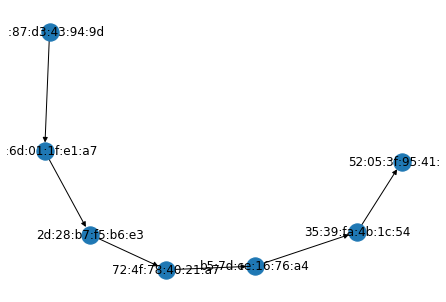

In [49]:
nx.draw(G, with_labels=True)

In [50]:
nx.is_weakly_connected(G)

True

In [51]:
ordered_macs = [x for x in nx.topological_sort(G)]

for i, mac in enumerate(ordered_macs):
    print(i, mac)

0 ca:87:d3:43:94:9d
1 5c:6d:01:1f:e1:a7
2 2d:28:b7:f5:b6:e3
3 72:4f:78:40:21:a7
4 b5:7d:ce:16:76:a4
5 35:39:fa:4b:1c:54
6 52:05:3f:95:41:e3
